<a href="https://colab.research.google.com/github/thomashooks53/scratchpad/blob/main/nb_2026_01_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/thomashooks53/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 27 (delta 1), reused 1 (delta 1), pack-reused 24 (from 1)
Receiving objects: 100% (27/27), 49.42 KiB | 816.00 KiB/s, done.
Resolving deltas: 100% (6/6), done.
Download complete
Extracting data files...
Data extracted


OK, let's see if this saves back the way I expect.

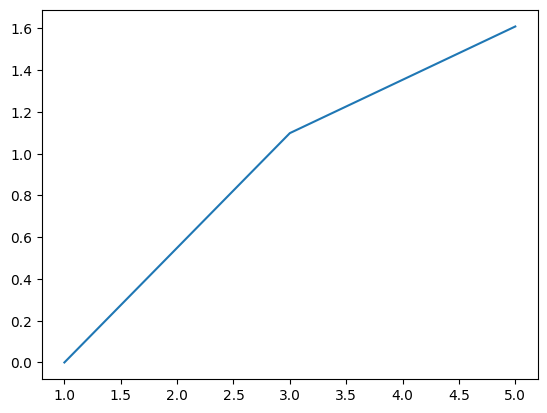

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,3,5])
y = np.log(x)

plt.plot(x,y)
plt.show()

/tmp/ipython-input-3093991861.py:5: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data/sharks.csv")


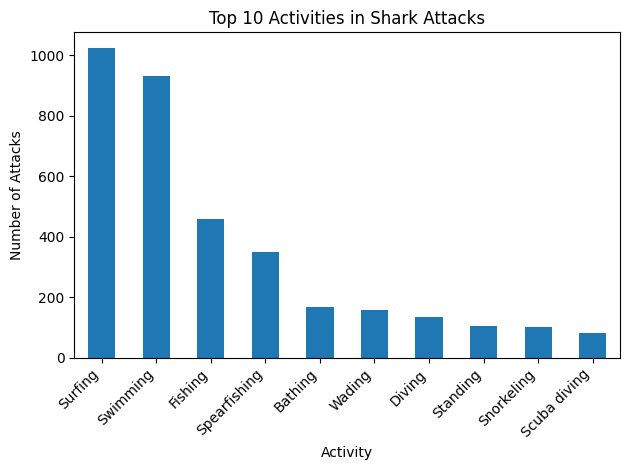

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/data/sharks.csv")

# Keep Activity column only
df = df[['Activity']].dropna()

# Clean text
df['Activity'] = df['Activity'].str.strip()

# Get top 10 activities by frequency
top_counts = df['Activity'].value_counts().head(10)

# Plot bar-style histogram (categorical)
plt.figure()
top_counts.plot(kind='bar')

plt.xlabel("Activity")
plt.ylabel("Number of Attacks")
plt.title("Top 10 Activities in Shark Attacks")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/data/sharks.csv")

# Keep only needed columns and drop missing
df = df[['Activity', 'Type']].dropna()

# Clean text
df['Activity'] = df['Activity'].str.strip()
df['Type'] = df['Type'].str.strip()

# Keep only Provoked or Unprovoked
df = df[df['Type'].isin(['Provoked', 'Unprovoked'])]

# Find top 10 activities overall
top_activities = (
    df['Activity']
    .value_counts()
    .head(10)
    .index
)

# Filter to top 10 activities
df_top = df[df['Activity'].isin(top_activities)]

# Create table: one row per activity, two columns
result = (
    df_top
    .groupby(['Activity', 'Type'])
    .size()
    .unstack(fill_value=0)
)

# Ensure column order
result = result[['Provoked', 'Unprovoked']]

print(result)


Type          Provoked  Unprovoked
Activity                          
Bathing              0         153
Diving              13         107
Fishing            185         139
Scuba diving         7          59
Snorkeling           5          91
Spearfishing        53         268
Standing             2         100
Surfing             13         965
Swimming            10         826
Wading               7         141


/tmp/ipython-input-1297036935.py:4: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data/sharks.csv")


/tmp/ipython-input-1739674245.py:5: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data/sharks.csv")


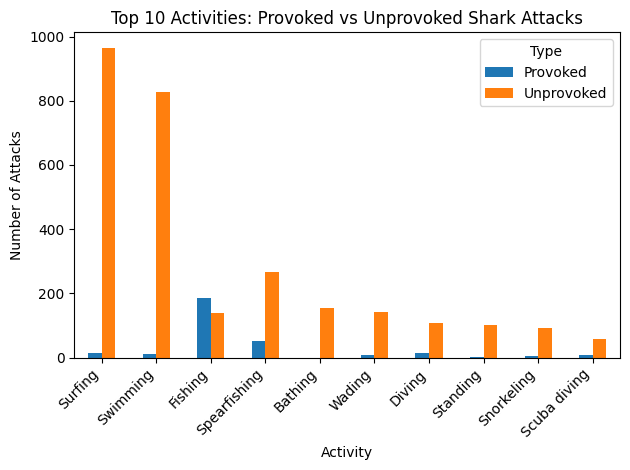

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/data/sharks.csv")

# Keep relevant columns and clean
df = df[['Activity', 'Type']].dropna()
df['Activity'] = df['Activity'].str.strip()
df['Type'] = df['Type'].str.strip()

# Keep only Provoked / Unprovoked
df = df[df['Type'].isin(['Provoked', 'Unprovoked'])]

# Identify top 10 activities
top_activities = df['Activity'].value_counts().head(10).index
df_top = df[df['Activity'].isin(top_activities)]

# Build table
counts = (
    df_top
    .groupby(['Activity', 'Type'])
    .size()
    .unstack(fill_value=0)
)

# Ensure consistent column order
counts = counts[['Provoked', 'Unprovoked']]

# Sort by total attacks (optional but cleaner)
counts['Total'] = counts.sum(axis=1)
counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot grouped bar chart
counts.plot(kind='bar')

plt.xlabel("Activity")
plt.ylabel("Number of Attacks")
plt.title("Top 10 Activities: Provoked vs Unprovoked Shark Attacks")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-852104965.py:5: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data/sharks.csv")


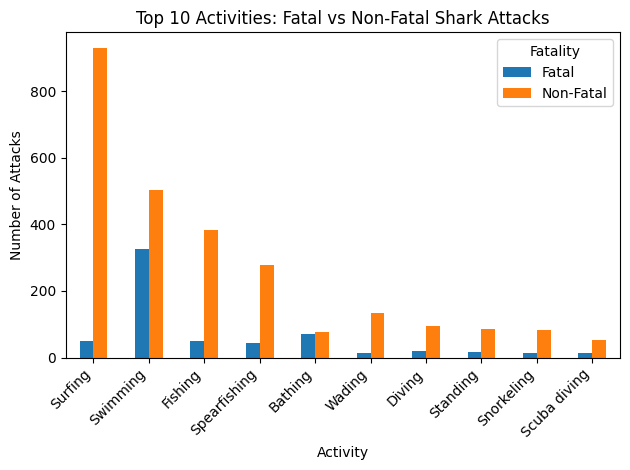

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/data/sharks.csv")

# Keep relevant columns and drop missing values
df = df[['Activity', 'Fatal (Y/N)']].dropna()

# Clean text
df['Activity'] = df['Activity'].str.strip()
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.strip()

# Keep only valid fatality values
df = df[df['Fatal (Y/N)'].isin(['Y', 'N'])]

# Rename for clarity
df['Fatality'] = df['Fatal (Y/N)'].map({'Y': 'Fatal', 'N': 'Non-Fatal'})

# Identify top 10 activities
top_activities = df['Activity'].value_counts().head(10).index
df_top = df[df['Activity'].isin(top_activities)]

# Build table
counts = (
    df_top
    .groupby(['Activity', 'Fatality'])
    .size()
    .unstack(fill_value=0)
)

# Ensure column order
counts = counts[['Fatal', 'Non-Fatal']]

# Sort by total attacks
counts['Total'] = counts.sum(axis=1)
counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot grouped bar chart
counts.plot(kind='bar')

plt.xlabel("Activity")
plt.ylabel("Number of Attacks")
plt.title("Top 10 Activities: Fatal vs Non-Fatal Shark Attacks")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1143958221.py:6: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data/sharks.csv")


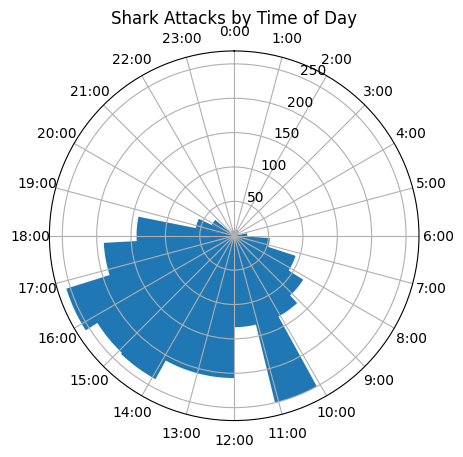

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/data/sharks.csv")

# Keep and clean Time column
df = df[['Time']].dropna()

# Keep only valid times in HHhMM format (e.g., 14h30)
df = df[df['Time'].str.contains('h', na=False)]

# Convert time to hours (float)
def time_to_hour(t):
    try:
        h, m = t.split('h')
        return int(h) + int(m)/60
    except:
        return np.nan

df['Hour'] = df['Time'].apply(time_to_hour)
df = df.dropna(subset=['Hour'])

# Convert hours to radians (0–24 → 0–2π)
angles = df['Hour'] / 24 * 2 * np.pi

# Create bins (1-hour bins)
bins = 24
counts, bin_edges = np.histogram(angles, bins=bins)

# Plot polar histogram
fig = plt.figure()
ax = plt.subplot(111, polar=True)

width = 2 * np.pi / bins
ax.bar(bin_edges[:-1], counts, width=width, align='edge')

# Clock-style formatting
ax.set_theta_zero_location('N')   # 00:00 at top
ax.set_theta_direction(-1)        # Clockwise
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([f"{h}:00" for h in range(24)])

ax.set_title("Shark Attacks by Time of Day", pad=20)

plt.show()


/tmp/ipython-input-357578341.py:6: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data/sharks.csv")


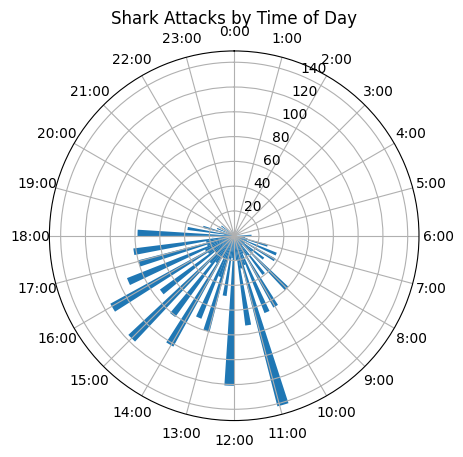

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/data/sharks.csv")

# Keep and clean Time column
df = df[['Time']].dropna()

# Keep only valid times in HHhMM format (e.g., 14h30)
df = df[df['Time'].str.contains('h', na=False)]

# Convert time to hours (float)
def time_to_hour(t):
    try:
        h, m = t.split('h')
        return int(h) + int(m)/60
    except:
        return np.nan

df['Hour'] = df['Time'].apply(time_to_hour)
df = df.dropna(subset=['Hour'])

# Convert hours to radians (0–24 → 0–2π)
angles = df['Hour'] / 24 * 2 * np.pi

# Create bins (1-hour bins)
bins =96
counts, bin_edges = np.histogram(angles, bins=bins)

# Plot polar histogram
fig = plt.figure()
ax = plt.subplot(111, polar=True)

width = 2 * np.pi / bins
ax.bar(bin_edges[:-1], counts, width=width, align='edge')

# Clock-style formatting
ax.set_theta_zero_location('N')   # 00:00 at top
ax.set_theta_direction(-1)        # Clockwise
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([f"{h}:00" for h in range(24)])

ax.set_title("Shark Attacks by Time of Day", pad=20)

plt.show()
